In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [50]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.pipeline import Pipeline

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
df = pd.read_csv('Twitter_Emotion_Dataset.csv')

In [6]:
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [7]:
df.groupby('label').describe()

tweet                                                               
        count unique                                                top freq
label                                                                       
anger    1101   1100  belajar agama yg tuntas jd nga ngarang dalam h...    2
fear      649    646  Aku gak salah bila mohon pd [USERNAME], segera...    2
happy    1017   1012  [USERNAME] Selamat Siang Sahabat Pos. Kiriman ...    4
love      637    636  Walaupun kita jauh secara fisik, kita tahu kit...    2
sadness   997    996  Turut sepenanggungan atas meninggalnya dr. Ram...    2

In [8]:
df['length'] = df['tweet'].apply(len)

In [9]:
df.head()

,label,tweet,length
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",220
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",235
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,116
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",250
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",203


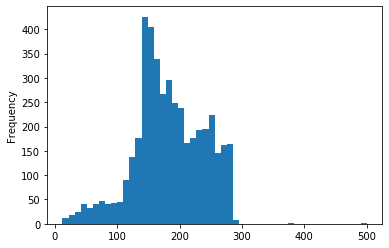

In [10]:
df['length'].plot(bins=50,kind='hist')

In [11]:
df['length'].describe()

count    4401.000000
mean      182.352193
std        55.697054
min        12.000000
25%       147.000000
50%       178.000000
75%       226.000000
max       500.000000
Name: length, dtype: float64

In [12]:
df.isnull().sum()

label     0
tweet     0
length    0
dtype: int64

In [13]:
df[df['length']==500]['tweet'].iloc[0]

'Acara tahunan "Sanusi Family", ini lah wajah para anak, cucu, cucu menantu, dan cicit terempong. Smg thn berikutnya bs makin kompak dan lengkap #7-8juli2018 [URL]\nanger;Wkwkwkw Keknya dah seminggu lebih meledak2 mulu. Emang orang sekitar gue pada gblk atau emang gaada otaknya dari dulu cuma gue nya yg sabar\nsadness;sabar ya boy kamu slalu d hina tmanku pdhal kamu ndak salah apa"" kamu slalu d bipang manusia lastik tpikan kamu bukan manusia plastik. Kapan temanku tdak mrnghinamu boy hwaiting boy"'

In [14]:
display(df[df['length']==12]['tweet'].iloc[0])

'pusing guweh'

[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249503E1668>


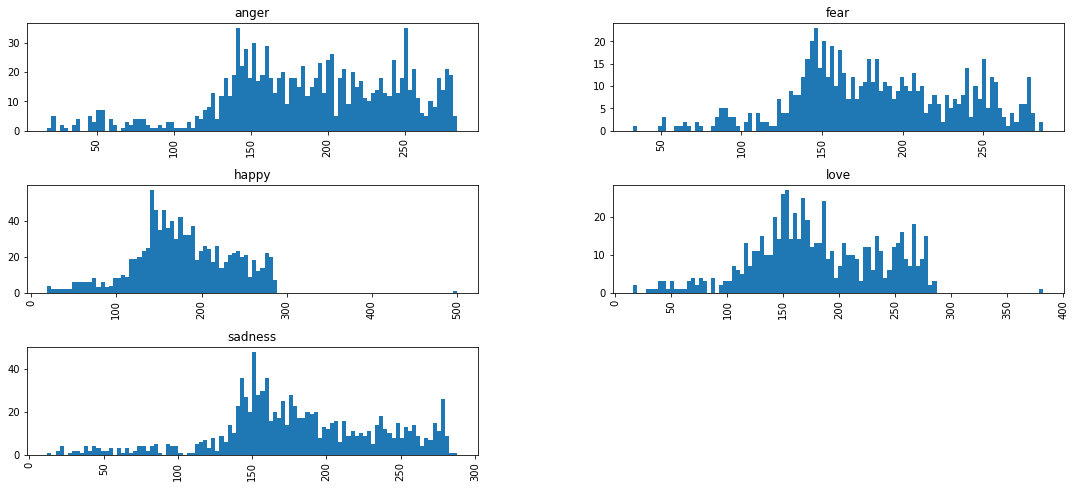

In [15]:
print(df.hist(column='length',by='label',bins=100,figsize=(18,8)))

In [19]:
stopwords.words('indonesian')[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [24]:
def text_preprocessing(kalimat):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in kalimat if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('indonesian')]

In [25]:
bow_transformer = CountVectorizer(analyzer=text_preprocessing).fit(df['tweet'])

In [26]:
print(len(bow_transformer.vocabulary_))

22802


In [28]:
tweet6 = df['tweet'][5]
print(tweet6)

Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain "lebay" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya.


In [31]:
bow6 = bow_transformer.transform([tweet6])
print(bow6)
print(bow6.shape)

  (0, 5161)	1
  (0, 6123)	1
  (0, 6396)	2
  (0, 6734)	1
  (0, 7705)	1
  (0, 7772)	1
  (0, 10572)	2
  (0, 11133)	1
  (0, 11981)	1
  (0, 14051)	1
  (0, 14757)	1
  (0, 16561)	1
  (0, 17007)	1
  (0, 18033)	1
  (0, 19622)	1
  (0, 19771)	1
  (0, 20269)	1
  (0, 21636)	4
  (0, 22002)	1
(1, 22802)


In [32]:
tweet_bow = bow_transformer.transform(df['tweet'])

In [33]:
print('Bentuk/shape dari Sparse Matrix: ', tweet_bow.shape)
print('Jumlah dari munculnya Non-Zero Occurences: ', tweet_bow.nnz)

Bentuk/shape dari Sparse Matrix:  (4401, 22802)
Jumlah dari munculnya Non-Zero Occurences:  74905


In [34]:
sparsity = (100.0 * tweet_bow.nnz / (tweet_bow.shape[0] * tweet_bow.shape[1]))
print(f'sparsity: {round(sparsity)}')

sparsity: 0


In [36]:
tfidf_transformer = TfidfTransformer().fit(tweet_bow)

In [37]:
tfidf6 = tfidf_transformer.transform(bow6)
print(tfidf6)

  (0, 22002)	0.16663896836124023
  (0, 21636)	0.6903677195877492
  (0, 20269)	0.09090565710406943
  (0, 19771)	0.16846828559937685
  (0, 19622)	0.21467276116490824
  (0, 18033)	0.19756277894418411
  (0, 17007)	0.1749446127435856
  (0, 16561)	0.16663896836124023
  (0, 14757)	0.1837489505819644
  (0, 14051)	0.15910077915568774
  (0, 11981)	0.16663896836124023
  (0, 11133)	0.19205459496430974
  (0, 10572)	0.15568232486025127
  (0, 7772)	0.10346051359946766
  (0, 7705)	0.1058951593985637
  (0, 6734)	0.1287401371780542
  (0, 6396)	0.30271660675730544
  (0, 6123)	0.07661610828561267
  (0, 5161)	0.17754538296992547


In [38]:
tweet_tfidf = tfidf_transformer.transform(tweet_bow)
print(tweet_bow.shape)

(4401, 22802)


In [41]:
multinomial_model = MultinomialNB().fit(tweet_tfidf, df['label'])

In [54]:
all_prediction = multinomial_model.predict(tweet_tfidf)

In [55]:
print(all_prediction)

['anger' 'anger' 'happy' ... 'anger' 'happy' 'sadness']


In [56]:
print(classification_report(df['label'],all_prediction))

              precision    recall  f1-score   support

       anger       0.85      0.99      0.91      1101
        fear       0.99      0.76      0.86       649
       happy       0.93      0.96      0.94      1017
        love       0.98      0.77      0.86       637
     sadness       0.88      0.95      0.91       997

    accuracy                           0.91      4401
   macro avg       0.93      0.88      0.90      4401
weighted avg       0.91      0.91      0.90      4401



In [49]:
X = df['tweet']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
multinomial_pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocessing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [53]:
multinomial_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocessing at 0x00000249504D12F0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [57]:
multinomial_prediction = multinomial_pipeline.predict(X_test)

In [59]:
print(classification_report(y_test,multinomial_prediction))
print(confusion_matrix(y_test,multinomial_prediction))

              precision    recall  f1-score   support

       anger       0.56      0.88      0.68       229
        fear       0.98      0.39      0.55       119
       happy       0.70      0.64      0.67       214
        love       0.86      0.40      0.55       119
     sadness       0.50      0.55      0.52       200

    accuracy                           0.62       881
   macro avg       0.72      0.57      0.60       881
weighted avg       0.68      0.62      0.61       881

[[202   0   6   0  21]
 [ 41  46  11   1  20]
 [ 43   0 138   3  30]
 [ 14   1  19  48  37]
 [ 63   0  24   4 109]]
